## Entanglement Swapping

Der folgende Schalkreis führt ein Entanglement Swapping durch. Nach dem Durchlaufen des Schaltkreises sind die Qubits $q_0$ und $q_3$ verschränkt.

In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, execute, Aer, IBMQ
from qiskit.circuit import QuantumCircuit,Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

#import python stuff
import matplotlib.pyplot as plt
import numpy as np

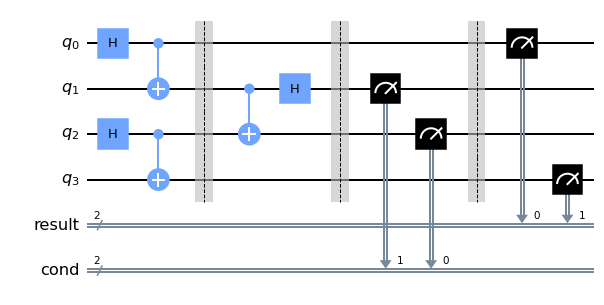

In [5]:
qc = QuantumCircuit()
qr = QuantumRegister(4,'q')
qc.add_register( qr )
crResult = ClassicalRegister(2,'result')
qc.add_register( crResult )
crCond = ClassicalRegister(2,'cond')
qc.add_register( crCond )


qc.h(0)
qc.cx(0,1)

qc.h(2)
qc.cx(2,3)

qc.barrier()

qc.cx(1,2)
qc.h(1)

qc.barrier()
qc.measure(qr[1],crCond[1])
qc.measure(qr[2],crCond[0])


qc.barrier()
qc.measure(qr[0],crResult[0])
qc.measure(qr[3],crResult[1])

qc.draw('mpl')

{'10 11': 2528, '01 01': 2517, '11 10': 2502, '10 00': 2508, '00 00': 2492, '01 10': 2490, '11 01': 2459, '00 11': 2504}


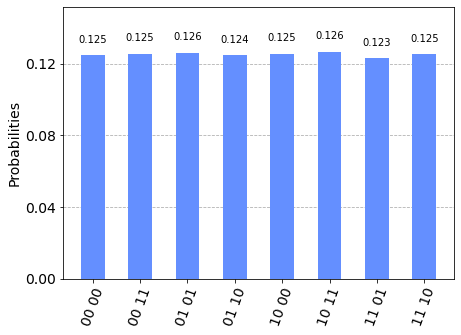

In [6]:
backend = Aer.get_backend('qasm_simulator')

job = execute(qc, backend, shots=20000)
result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

Interpretation des Diagramms:

Die unteren beiden Werte repräsentieren das Meßergebniss der Qubits $q_1$ und $q_2$ und die oberen beiden Meßwerte den zugehörigen Zustand von $q_0$ und $q_3$

* Wird für $q_1q_2$ der Wert "00" gemessen, so gilt: $|q1q3\rangle = \frac{1}{\sqrt{2}}(|00\rangle \pm |11\rangle)$
* Wird für $q_1q_2$ der Wert "01" gemessen, so gilt: $|q1q3\rangle = \frac{1}{\sqrt{2}}(|01\rangle \pm |10\rangle)$
* Wird für $q_1q_2$ der Wert "10" gemessen, so gilt: $|q1q3\rangle = \frac{1}{\sqrt{2}}(|00\rangle \pm |11\rangle)$
* Wird für $q_1q_2$ der Wert "11" gemessen, so gilt: $|q1q3\rangle = \frac{1}{\sqrt{2}}(|01\rangle \pm |10\rangle)$

Das konkrete "Vorzeichen $\pm$" kann aus der obigen Simulation (Messung) nicht abgelesen werden. 